# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import tests 
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Since the charge data is extremely right skewed, the mean and standard deviation are strongly influenced by the outliers. Thus, the mean is higher than the true center of the data, and the spread will also be larger than the true spread of the data

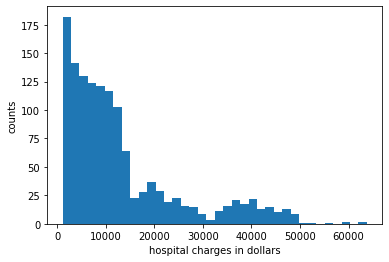

In [4]:
plt.hist(medical['charges'], bins=int(np.sqrt(medical.shape[0])), histtype='bar')
plt.xlabel('hospital charges in dollars')
plt.ylabel('counts')
plt.show()

In [5]:
charges_mean=np.mean(medical['charges'])
charges_std=np.std(medical['charges'], ddof=1)
charges_mean, charges_std

(13270.422265141257, 12110.011236693994)

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since the sample size is 1338, the CLT states that the sample means will be approximately normally distributed. Thus, we are able to conduct a t test to see if the average charges have fallen bellow 12, 000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since we are only concered with determining if the charges have fallen below 12, 000, we can conduct a one-sided interval. In fact, it will be a left sided interval. The left sided interval is 12,725. Since the left sided confidence interval is larger than 12,000, the administrator should not be concerned.

In [6]:
t_critical=t.ppf(.05, len(medical['charges'])-1)
t_critical

-1.6459941145571324

In [7]:
margin_error=t_critical*charges_std/np.sqrt(len(medical['charges']))
margin_error

-544.9350813250253

In [8]:
charges_mean+margin_error

12725.48718381623

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is there is no difference between the average charges for people with insurance compared to those without. The pooled t test assumes the two groups have the same variance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ How I calculated the t statistic, the alternative hypothesis is a left tailed test. The t stat is -11.89, which give a p-value approximately equal to 0. Thus, we reject the null hypothesis. Thus, there is sufficient evidence to suggest that on average patients with insurance are charged more than those without insurance. The p-values are not the same between the two methods because scipy.stats.ttest_ind_from_stats can only conduct a two tailed test. However, both the manual and the automated method provides the same t statistic. 

In [35]:
charge_insurance=medical.groupby('insuranceclaim').agg({'charges':['mean',"std", 'count']})
charge_insurance

charges                    
                        mean           std count
insuranceclaim                                  
0                8821.421892   6446.510127   555
1               16423.928277  14045.928419   783

In [37]:
# calculating summary statistics for the non-insurance claims
std0=charge_insurance.loc[0,('charges',"std")]
n0=charge_insurance.loc[0,('charges',"count")]
mean0=charge_insurance.loc[0,('charges',"mean")]

# calculating summary statistics for the insurance claims
std1=charge_insurance.loc[1,('charges',"std")]
n1=charge_insurance.loc[1,('charges',"count")]
mean1=charge_insurance.loc[1,('charges',"mean")]

In [45]:
# calculating the pooled standard deviation
sp=np.sqrt(((n0-1)*std0**2+(n1-1)*std1**2)/(n0+n1-2))

# calculating the t stat
t_stat=(mean0-mean1)/(sp*np.sqrt((1/n0)+(1/n1)))

round(t_stat, 2), t.cdf(t_stat, (n0+n1-2))

(-11.89, 2.230615115810486e-31)

In [67]:
help(scipy.stats.ttest_ind_from_stats)

Help on function ttest_ind_from_stats in module scipy.stats.stats:

ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True)
    T-test for means of two independent samples from descriptive statistics.
    
    This is a two-sided test for the null hypothesis that two independent
    samples have identical average (expected) values.
    
    Parameters
    ----------
    mean1 : array_like
        The mean(s) of sample 1.
    std1 : array_like
        The standard deviation(s) of sample 1.
    nobs1 : array_like
        The number(s) of observations of sample 1.
    mean2 : array_like
        The mean(s) of sample 2.
    std2 : array_like
        The standard deviations(s) of sample 2.
    nobs2 : array_like
        The number(s) of observations of sample 2.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does n

In [53]:
scipy.stats.ttest_ind_from_stats(mean0, std0, n0, mean1, std1, n1, equal_var=True)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

In [69]:
help(scipy.stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension.
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': returns nan
          * 'raise': throws a

__A:__ The is not an equivalent version for the z test. However, if you have a large enough sample size, the t distribution converges to the standard normal; thus, you can approxiamte the z test from the t test when the sample size is sufficiently large. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test